# MATLAB Engine for Python - Capabilities

The MATLAB Engine allows you to:

1. **Call MATLAB functions** - Use any built-in or custom MATLAB function
2. **Execute MATLAB code** - Run MATLAB commands as strings
3. **Transfer data** - Pass NumPy arrays to/from MATLAB
4. **Access MATLAB workspace** - Set/get variables in MATLAB's workspace
5. **Run MATLAB scripts** - Execute your existing .m files
6. **Control MATLAB session** - Start, stop, and manage MATLAB instances

# Installing - (Run this in Powershell)


& "C:\Python311\python.exe" -m pip install --user "matlabengine==25.2.2"

In [64]:
import matlab.engine
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()

# Start MATLAB engine
eng = matlab.engine.start_matlab()
print("MATLAB engine started!")

MATLAB engine started!


## 1. Call MATLAB Functions

In [18]:
# Call MATLAB's sqrt function
result = eng.sqrt(16.0)
print(f"sqrt(16) = {result}")

# Call MATLAB's sin function
result = eng.sin(np.pi/2)
print(f"sin(π/2) = {result}")

# Use MATLAB's random number generator
random_matrix = eng.rand(3, 3)
print(f"Random 3x3 matrix:\n{random_matrix}")

sqrt(16) = 4.0
sin(π/2) = 1.0
Random 3x3 matrix:
[[0.8147236863931789,0.9133758561390194,0.2784982188670484],[0.9057919370756192,0.6323592462254095,0.5468815192049838],[0.12698681629350606,0.09754040499940952,0.9575068354342976]]


## 2. Execute MATLAB Code Directly

In [19]:
# Execute MATLAB code as a string
eng.eval("x = 1:10;", nargout=0)
eng.eval("y = x.^2;", nargout=0)

# Plot in MATLAB
eng.eval("figure; plot(x, y); title('Parabola'); xlabel('x'); ylabel('y');", nargout=0)
print("Plot created in MATLAB!")

Plot created in MATLAB!


## 3. Transfer Data Between Python and MATLAB

In [20]:
# Create NumPy array in Python
python_array = np.array([[1, 2, 3], [4, 5, 6]])
print(f"Python array:\n{python_array}")

# Convert to MATLAB array
matlab_array = matlab.double(python_array.tolist())

# Pass to MATLAB and perform operations
result = eng.sum(matlab_array)
print(f"\nColumn sums from MATLAB: {result}")

# Get data back from MATLAB to Python
eng.workspace['test_data'] = matlab_array
retrieved = np.array(eng.workspace['test_data'])
print(f"\nRetrieved back to Python:\n{retrieved}")

Python array:
[[1 2 3]
 [4 5 6]]

Column sums from MATLAB: [[5.0,7.0,9.0]]

Retrieved back to Python:
[[1. 2. 3.]
 [4. 5. 6.]]


## 4. Run Your Existing MATLAB Scripts (.m files)

In [66]:
# Add project directory and external dependencies to MATLAB path
eng.addpath(os.getenv('ROOT'), nargout=0)
eng.addpath(os.getenv('ROOT') + r'external/npy-matlab', nargout=0)

# Call your custom MATLAB functions from this workspace
# For example, if you have bpsk.m or pam.m:

# Example: Generate PAM signal using your pam.m function
# num_symbols = 1000
# M = 4  # 4-PAM
# signal = eng.pam(num_symbols, M, nargout=1)

print("MATLAB path updated. You can now call bpsk(), pam(), mqam() functions!")
print("External dependencies (npy-matlab) loaded successfully!")

MATLAB path updated. You can now call bpsk(), pam(), mqam() functions!
External dependencies (npy-matlab) loaded successfully!


In [ ]:
M = 2
num_symbols = 2
save_path = os.getenv('ROOT') + '/data_pam'
output_len = 4800
fs = 48000
Tsymb = 0.001
fc = 6000
Var = 1

# Convert all numeric values to matlab.double
eng.pam(
    matlab.double(num_symbols),
    save_path,                      # strings are fine as-is
    matlab.double(output_len),
    matlab.double(fs),
    matlab.double(Tsymb),
    matlab.double(fc),
    matlab.double(M),
    matlab.double(Var),
    nargout=0
)

## 5. Use MATLAB for Signal Processing 

In [22]:
# Example: Use MATLAB's signal processing capabilities
# Generate a signal in Python, process in MATLAB, bring back to Python

# Create a noisy signal
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(1000)

# Convert to MATLAB format
matlab_signal = matlab.double(signal.tolist())

# Use MATLAB's filter design and filtering
eng.workspace['sig'] = matlab_signal
eng.eval("[b, a] = butter(4, 0.1);", nargout=0)  # Design lowpass filter
eng.eval("filtered = filter(b, a, sig);", nargout=0)  # Apply filter

# Get filtered signal back
filtered_signal = np.array(eng.workspace['filtered']).flatten()

print(f"Original signal shape: {signal.shape}")
print(f"Filtered signal shape: {filtered_signal.shape}")
print("Signal processed using MATLAB's Butterworth filter!")

Original signal shape: (1000,)
Filtered signal shape: (1000,)
Signal processed using MATLAB's Butterworth filter!


## 6. Load Your BPSK/PAM Data and Process with MATLAB

In [59]:
# Load your BPSK data from the data_bpsk folder
bpsk_data = np.load(r'/Users/matthewxu/CursorProjects/FH11_RFML/data_pam/pam2_2.npy')
print(f"BPSK data shape: {bpsk_data.shape}")

# Convert to MATLAB and perform analysis
matlab_bpsk = matlab.double(bpsk_data.tolist())

# Example: Calculate power spectral density using MATLAB
eng.workspace['bpsk_signal'] = matlab_bpsk
eng.eval("Fs = 1000;", nargout=0)  # Sample rate
eng.eval("[pxx, f] = pwelch(bpsk_signal, [], [], [], Fs);", nargout=0)

# Get results back
pxx = np.array(eng.workspace['pxx']).flatten()
f = np.array(eng.workspace['f']).flatten()

print(f"Computed PSD with {len(f)} frequency bins")
print("You can now plot this in Python using matplotlib!")

BPSK data shape: (4800, 1)
Computed PSD with 1025 frequency bins
You can now plot this in Python using matplotlib!


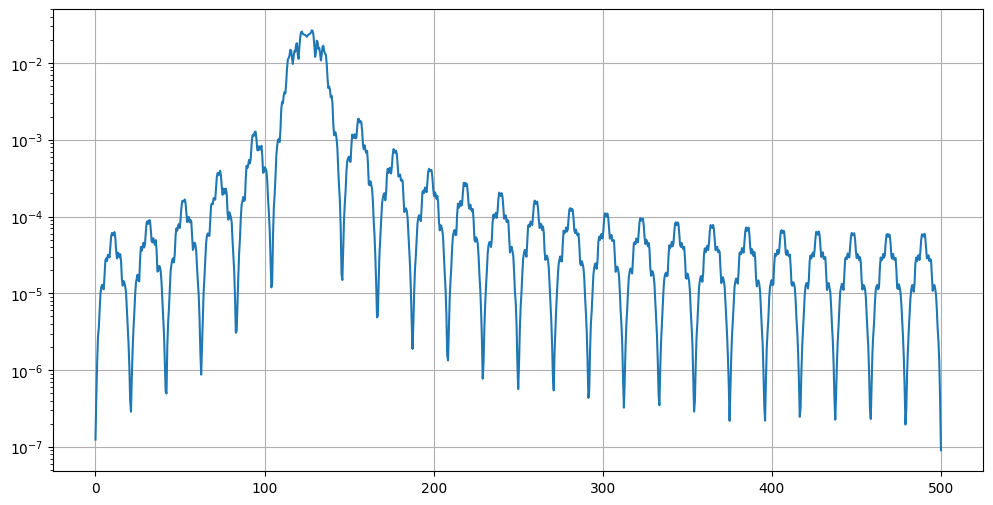

In [60]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12,6))
plt.semilogy(f,pxx)
plt.grid(True)

## 7. Close MATLAB Engine When Done

In [61]:
# When you're done, close the MATLAB engine to free resources
eng.quit()
print("Remember to call eng.quit() when done to close MATLAB!")

Remember to call eng.quit() when done to close MATLAB!
